In [1]:
import os
dataset_path = '/home/witsemp/work/09042021/BowlCanDataset_RGBD'
dataset_path_train = os.path.join(dataset_path, 'train')
dataset_path_valid = os.path.join(dataset_path, 'valid')
dataset_path_test = os.path.join(dataset_path, 'test')

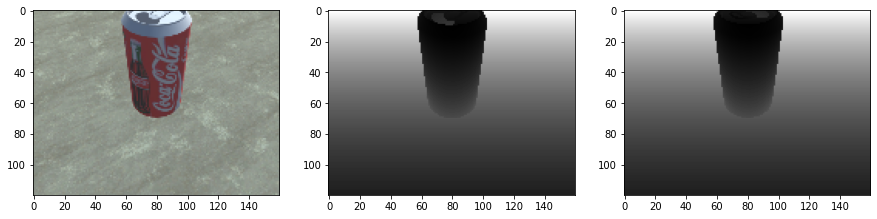

In [24]:
from Torch_Dataset import RotationDataset
from Torch_Dataset import image_from_tensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np
import torch
training_dataset = RotationDataset(dataset_path=dataset_path_train, transform=None)
training_dataloader = DataLoader(dataset=training_dataset, batch_size=1, shuffle=True)
input_rgb, input_depth, target_depth = next(iter(training_dataloader))
input_rgb, input_depth, target_depth = input_rgb[0], input_depth[0], target_depth[0]
input_rgb, input_depth, target_depth = image_from_tensor(input_rgb, 255), \
                                        image_from_tensor(input_depth, 1.09), \
                                        image_from_tensor(target_depth, 1.09)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(input_rgb.astype(np.uint8))
ax2.imshow(input_depth, cmap='gray')
ax3.imshow(target_depth, cmap='gray')

In [3]:
from Torch_Dataset import RotationDataset
from Train import Train
from FuseNet import FuseNetRGBD
import torch
from torch import nn
from torch.utils.data import DataLoader
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = FuseNetRGBD()
criterion = nn.L1Loss()
save_path = '/home/witsemp/fuse_net.pth'
epochs = 10
learning_rate = 1e-3
batch_size = 16
training_dataset = RotationDataset(dataset_path=dataset_path_train, transform=None)
training_dataloader = DataLoader(dataset=training_dataset, batch_size=batch_size, shuffle=True)
Train(device, model, criterion, epochs, learning_rate, save_path, training_dataset, training_dataloader, batch_size)



[INFO] FuseNet model has been created
Epoch 0, batch number: 0/53.125


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 3.95 GiB total capacity; 2.64 GiB already allocated; 15.56 MiB free; 2.74 GiB reserved in total by PyTorch)